# Week 5 Lab Assignment: Evaluating Model Fit, Scoring, Reporting

### Objective
In this lab, you will learn how to evaluate the fit of a regression model using various metrics and visual tools. You will calculate R-squared, MSE, RMSE, and perform residual analysis to assess model performance.

### 1. Setup and Installations
**Objective:** Ensure all necessary packages are installed and imported for the lab.

**Tasks:**
1. Install required Python packages: pandas, scikit-learn, matplotlib, numpy.

In [1]:
# Install necessary packages
%pip install pandas scikit-learn matplotlib numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



### 2. Import Libraries
**Objective:** Import all necessary libraries for data manipulation, modeling, and evaluation.


In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

### 3. Load and Explore Dataset
**Objective:** Gain a preliminary understanding of the dataset to be used for modeling.

**Tasks:**
1. **Load the Dataset:** Import the dataset into a Pandas DataFrame.
2. **Inspect the Data:** Use Pandas functions to inspect the first few rows, check for missing values, and understand the data types.
3. **Summary Statistics:** Generate summary statistics for numerical columns.

In [3]:
# Load the dataset
df = pd.read_csv('customer_behavior.csv')

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Generate summary statistics
print(df.describe())

   Age  Income Category  Number_of_Purchases  Target  Continuous_Target
0   25   50000        A                    3       0             100500
1   45   80000        B                    8       1             160800
2   30   54000        A                    4       0             109080
3   35   60000        C                    2       1             121200
4   50   95000        B                    7       1             191950
Age                    0
Income                 0
Category               0
Number_of_Purchases    0
Target                 0
Continuous_Target      0
dtype: int64
             Age         Income  Number_of_Purchases     Target  \
count  30.000000      30.000000            30.000000  30.000000   
mean   39.200000   71300.000000             5.033333   0.666667   
std    10.018603   17078.217625             2.220334   0.479463   
min    22.000000   49000.000000             1.000000   0.000000   
25%    31.250000   56500.000000             3.000000   0.000000   
50%

### 4. Data Preparation
**Objective:** Prepare the data for modeling by handling missing values and encoding categorical variables.

**Tasks:**
1. **Handle Missing Values:** Deal with any missing values in the dataset.
2. **Encode Categorical Variables:** Convert categorical variables into numerical format using techniques like one-hot encoding.
3. **Train-Test Split:** Split the data into training and testing sets.

In [4]:
# Handle missing values
df = df.dropna()

# Encode categorical variables (if necessary)
df = pd.get_dummies(df, drop_first=True)

# Split the data into training and testing sets
X = df.drop('Continuous_Target', axis=1)
y = df['Continuous_Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Training set size: (21, 6)
Test set size: (9, 6)


### 5. Implementing and Evaluating Linear Regression
**Objective:** Build and evaluate a multiple linear regression model on the dataset.

**Tasks:**
1. **Build the Model:** Create a multiple linear regression model using Scikit-learn.
2. **Train the Model:** Train the model on the training data.
3. **Evaluate the Model:** Use R-squared, MSE, and RMSE to evaluate the model's performance.

In [5]:
# Build and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
predictions = linear_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: 0.9992198074126457
Mean Squared Error: 893925.300476792
Root Mean Squared Error: 945.4762294615301


### 6. Residual Analysis
**Objective:** Perform residual analysis to assess model fit.

**Tasks:**
1. **Plot Residuals:** Plot residuals to visually inspect the fit.
2. **Interpret Residual Plots:** Analyze the residual plots to identify any patterns or biases.

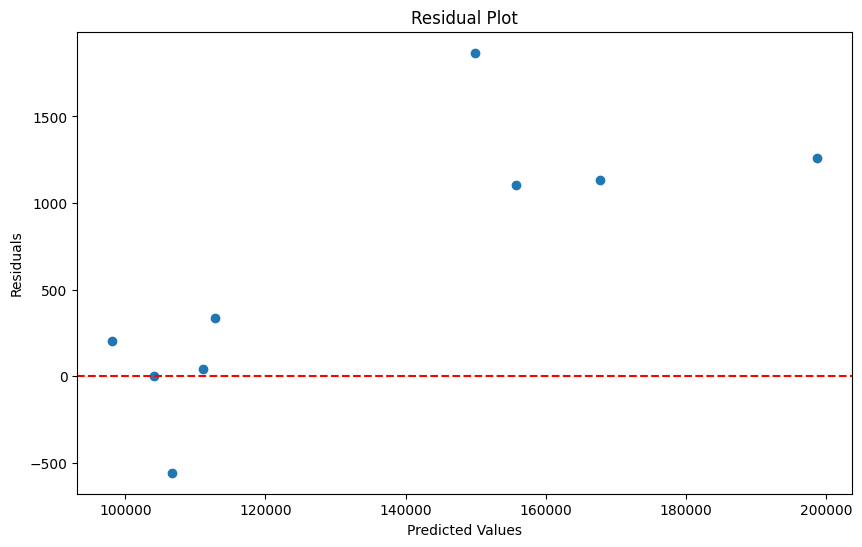

In [6]:
# Plot residuals
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### 7. Generating Reports
**Objective:** Generate a report summarizing model performance and residual analysis.

**Tasks:**
1. **Summary Report:** Use Python to generate a summary report including all metrics and residual plots.
2. **Discussion:** Discuss the model's performance and potential areas of improvement.

In [7]:
# Generate a summary report
report = f"""
Model Performance Report
-------------------------
R-squared: {r2}
Mean Squared Error: {mse}
Root Mean Squared Error: {rmse}

Residual Analysis:
- Check the residual plot for patterns.
- Ideally, residuals should be randomly distributed around zero.
Recommendations:
- Consider model improvements if residuals show patterns.
- Possible improvements include feature engineering or model regularization.
"""
print(report)


Model Performance Report
-------------------------
R-squared: 0.9992198074126457
Mean Squared Error: 893925.300476792
Root Mean Squared Error: 945.4762294615301

Residual Analysis:
- Check the residual plot for patterns.
- Ideally, residuals should be randomly distributed around zero.
Recommendations:
- Consider model improvements if residuals show patterns.
- Possible improvements include feature engineering or model regularization.



### 8. Submission
**Deliverables:**
- Jupyter Notebook (.ipynb) with all code, model evaluations, and residual analysis.
- A brief report summarizing the findings, including the evaluation metrics and residual analysis.

**Deadline:** Submit your completed notebook and report to the course portal by end of class.